# 2018 - 09 - 20 (jueves)

## Comentarios Tarea 2

## 27 septiembre
    - Propuesta proyecto
## 4 octubre
    - Tarea 3
    - Presentación proyectos

---

## Algunos ejercicios en Pandas

### 1. Cargue Casen 2017 y obtenga estadisticas básicas

Link Casen "small": https://www.dropbox.com/s/jzsx4nccxfkf4nh/Casen%202017small.zip?dl=0

In [4]:
import pandas as pd

df = pd.read_stata(r'C:\Users\carlo\Sync\Clase Data Science\Datos\casen_2017_stata\Casen 2017small.dta')

In [5]:
df.columns

Index(['folio', 'o', 'id_vivienda', 'hogar', 'region', 'provincia', 'comuna',
       'zona', 'expr', 'expc',
       ...
       'hh_d_estado', 'hh_d_servbas', 'hh_d_entorno', 'hh_d_accesi',
       'hh_d_medio', 'hh_d_appart', 'hh_d_tsocial', 'hh_d_seg',
       'pobreza_multi_4d', 'pobreza_multi_5d'],
      dtype='object', length=486)

In [3]:
df.ytoth.describe()

count    2.164390e+05
mean     1.099658e+06
std      1.434400e+06
min      0.000000e+00
25%      4.983330e+05
50%      7.700000e+05
75%      1.234167e+06
max      8.905000e+07
Name: ytoth, dtype: float64

### 2. Calcule el número de personas por region



In [6]:
#con esto, vemos una "muestra" de las filas
df.head()

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
0,1.101100e+11,1.0,1.101100e+09,1.0,Región de Tarapacá,Iquique,Iquique,Urbano,39.0,33.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN
1,1.101100e+11,1.0,1.101100e+09,1.0,Región de Tarapacá,Iquique,Iquique,Urbano,39.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pobre,Pobre
2,1.101100e+11,1.0,1.101100e+09,1.0,Región de Tarapacá,Iquique,Iquique,Urbano,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
3,1.101100e+11,2.0,1.101100e+09,1.0,Región de Tarapacá,Iquique,Iquique,Urbano,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
4,1.101100e+11,1.0,1.101100e+09,1.0,Región de Tarapacá,Iquique,Iquique,Urbano,39.0,33.0,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,No pobre,NaN


In [7]:
grupos_por_region = df.groupby(['region'])

In [8]:
grupos_por_region

In [17]:
por_region = grupos_por_region[['folio']].count()

In [18]:
#aqui tenemos un "DataFrame" por region, con el numero de personas
por_region


,folio
region,
Región de Tarapacá,10150
Región de Antofagasta,8510
Región de Atacama,6961
Región de Coquimbo,9952
Región de Valparaíso,19625
Región del Libertador Gral. Bernardo OHiggins,15862
Región del Maule,15208
Región del Biobío,21532
Región de La Araucanía,15481


In [16]:
type(por_region)

pandas.core.series.Series

### 3. Haga un grafico circular con el número de personas por región

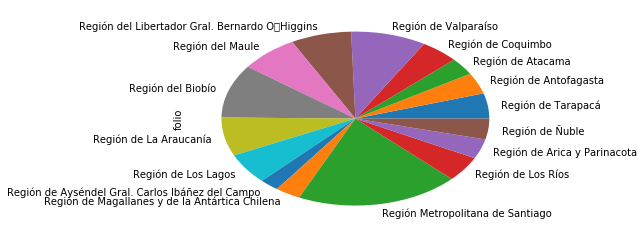

In [20]:
import matplotlib.pyplot as plt

#aqui hacemos el grafico
por_region.plot.pie(y='folio', legend=False)

plt.show()

### 4. Repita el gráfico anterior, considerando el factor de expansión regional

In [22]:
#volvemos a ocupar el objeto "groupby"

por_region_expr = grupos_por_region[['expr']].sum()

In [24]:
por_region_expr

,expr
region,
Región de Tarapacá,346917.0
Región de Antofagasta,586198.0
Región de Atacama,284814.0
Región de Coquimbo,775198.0
Región de Valparaíso,1856498.0
Región del Libertador Gral. Bernardo OHiggins,929632.0
Región del Maule,1047293.0
Región del Biobío,1625099.0
Región de La Araucanía,999730.0


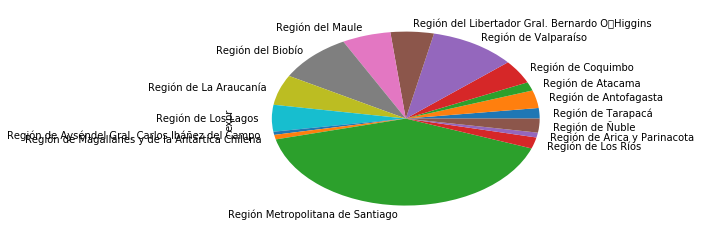

In [23]:
por_region_expr.plot.pie(y='expr', legend=False)
plt.show()

### 5. ¿cuáles regiones están más o menos representadas? (ver ratio entre poblaciones)


In [30]:
por_region

,folio
region,
Región de Tarapacá,10150
Región de Antofagasta,8510
Región de Atacama,6961
Región de Coquimbo,9952
Región de Valparaíso,19625
Región del Libertador Gral. Bernardo OHiggins,15862
Región del Maule,15208
Región del Biobío,21532
Región de La Araucanía,15481


In [26]:
por_region_expr['ratio'] = por_region_expr.expr / por_region.folio

por_region_expr.sort_values(by=['ratio'], ascending=False, inplace=True)

por_region_expr

,expr,ratio
region,,
Región Metropolitana de Santiago,7223236.0,169.555550
Región de Valparaíso,1856498.0,94.598624
Región de Coquimbo,775198.0,77.893690
Región del Biobío,1625099.0,75.473667
Región de Los Lagos,882790.0,70.952419
Región de Antofagasta,586198.0,68.883431
Región del Maule,1047293.0,68.864611
Región de La Araucanía,999730.0,64.577870
Región del Libertador Gral. Bernardo OHiggins,929632.0,58.607490


### 5. Muestre un gráfico de barra, por región, con el porcentaje de mujeres de la región (usar factor exp regional)

Detalle de variables:

http://observatorio.ministeriodesarrollosocial.gob.cl/casen-multidimensional/casen/docs/Libro_de_Codigos_Casen_2017.pdf

In [27]:
df.sexo.describe()

count     216439
unique         2
top        Mujer
freq      113117
Name: sexo, dtype: object

In [28]:
df.sexo.unique()

[Mujer, Hombre]
Categories (2, object): [Hombre < Mujer]

In [31]:
#identificamos a las mujeres
df['mujer'] = df.sexo == 'Mujer'

#"aumentamos" segun factor de expansion
df['mujer_aumentada'] = df.expr * df['mujer']

#colapsamos por region
grupo_por_region_mujeres = df.groupby(['region'])

datos_por_region = grupo_por_region_mujeres[['expr', 'mujer_aumentada']].sum()

datos_por_region

,expr,mujer_aumentada
region,,
Región de Tarapacá,346917.0,177810.0
Región de Antofagasta,586198.0,302290.0
Región de Atacama,284814.0,149403.0
Región de Coquimbo,775198.0,406945.0
Región de Valparaíso,1856498.0,990040.0
Región del Libertador Gral. Bernardo OHiggins,929632.0,484942.0
Región del Maule,1047293.0,540698.0
Región del Biobío,1625099.0,859657.0
Región de La Araucanía,999730.0,525050.0


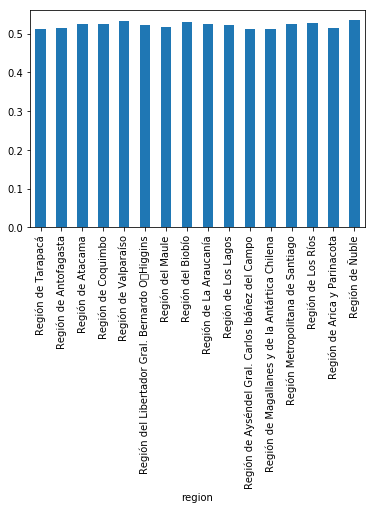

In [32]:

#calculamos porcentaje
datos_por_region['Porcentaje Mujeres'] = (
    datos_por_region.mujer_aumentada / datos_por_region.expr)

#graficamos
datos_por_region['Porcentaje Mujeres'].plot.bar()
plt.show()

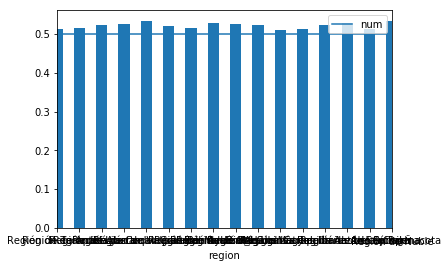

In [33]:
grafico_memoria = datos_por_region['Porcentaje Mujeres'].plot.bar()

datos_por_region['num'] = 0.5

datos_por_region.plot(y='num', ax=grafico_memoria)

plt.show()

In [ ]:
por_region_expr

### 5. Propuesto: Qué regiones están sobre o sub representadas, respecto de los totales de población del Censo 2017?

In [ ]:
# calculamos porcentajes de población por region

# por_region_expr['total_pob'] = sum(por_region_expr.pers_factor)

# unimos con datos del Censo
